In [2]:
import cv2
import cv2.aruco as aruco
import matplotlib.pyplot as plt
import numpy as np

cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise Exception("Não foi possível abrir a câmara.")

In [9]:
def grab_camara_frame(cap):

    # Ler um frame da câmara
    ret, frame = cap.read()

    # Verificar se o frame foi lido com sucesso
    if not ret:
        raise Exception("Não foi possível receber o frame (stream terminou?). A sair...")
    return frame

def show_img(x):
    fig, ax = plt.subplots(figsize=(8, 6))  # Ajuste o tamanho conforme necessário
    im = ax.imshow(cv2.cvtColor(x, cv2.COLOR_BGR2RGB))  # Inicializar com um frame
    plt.show()


def create_aruco(marker_id):
    aruco_dict = aruco.getPredefinedDictionary(aruco.DICT_6X6_250)
    marker_size = 200
    marker_image = np.zeros((marker_size, marker_size, 1), dtype=np.uint8)
    return aruco.generateImageMarker(aruco_dict, marker_id, marker_size, marker_image, 1)

def detect_aruco(frame):
    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Define the ArUco dictionary
    # Note: Use the same dictionary type that was used to create the marker
    aruco_dict = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)
    
    # Create parameters and detector
    parameters = cv2.aruco.DetectorParameters()
    detector = cv2.aruco.ArucoDetector(aruco_dict, parameters)
    
    # Detect markers
    corners, ids, rejected = detector.detectMarkers(gray)
        
    return ids, corners

In [13]:
corners

(array([[[370., 251.],
         [381., 306.],
         [324., 313.],
         [316., 256.]]], dtype=float32),)

In [ ]:
frame = grab_camara_frame(cap)
#show_img(frame)
ids, corners = detect_aruco(frame)
detections =cv2.aruco.drawDetectedMarkers(frame, corners, ids)
show_img(detections)

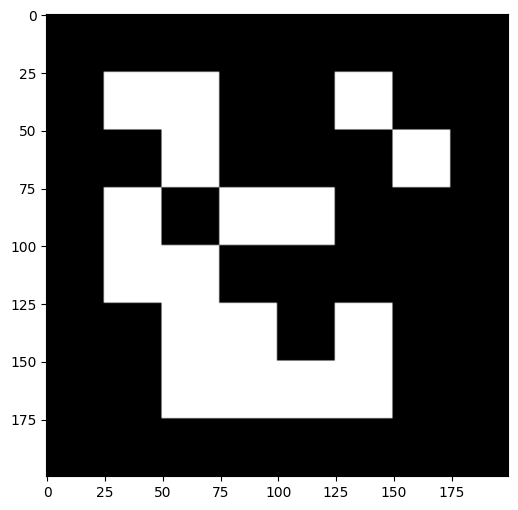

True

In [41]:
#frame = grab_camara_frame(cap)
#show_img(frame)
i = 0
aruco_code=create_aruco(i)
show_img(aruco_test)
cv2.imwrite("aruco" + str(i) + ".jpg", aruco_code)

In [12]:
cap.release()